In [4]:
# General use
import numpy as np
import matplotlib.pyplot as plt
# For the scan conversion part
import math
from scipy import signal
from scipy.interpolate import griddata
from scipy.signal import decimate, convolve 

filz = np.load("data/hp2121.npz")
signal = filz['signal.npy']

# Checking content of the lines

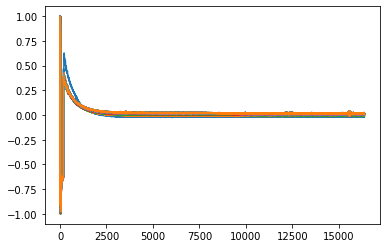

In [8]:
for line in signal:
    plt.plot(line)

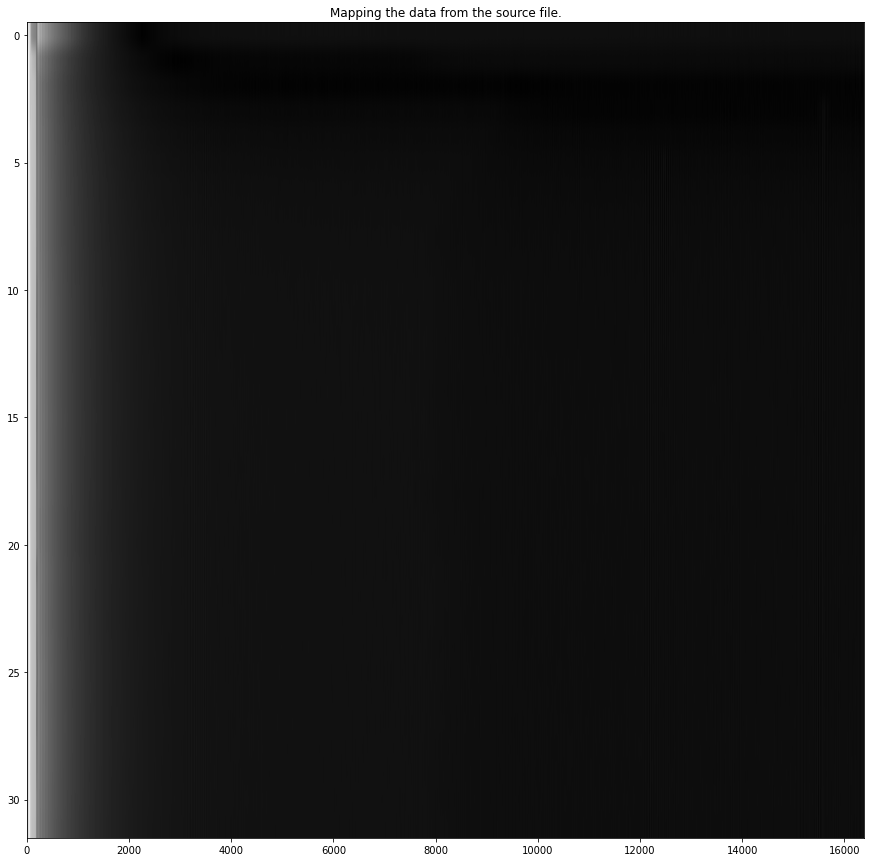

In [27]:
plt.figure(figsize=(15,15)) 
plt.imshow((abs(signal)**0.7), aspect='auto',cmap=plt.get_cmap('gray')) 
plt.title("Mapping the data from the source file.")    
plt.show()

# Frequency check

Text(0.5, 1.0, 'Spectrum content')

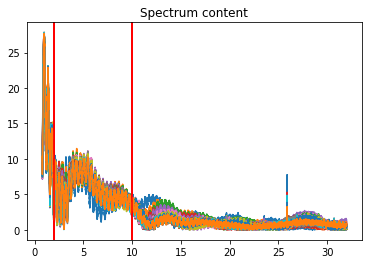

In [23]:
L = len(signal[0])
f = [x*64.0/L for x in range(L)]
for line in signal:
    plt.plot(f[200:L//2],np.abs(np.fft.fft(line))[200:L//2])
    plt.axvline(2,color="red")
    plt.axvline(10,color="red")
plt.title("Spectrum content")

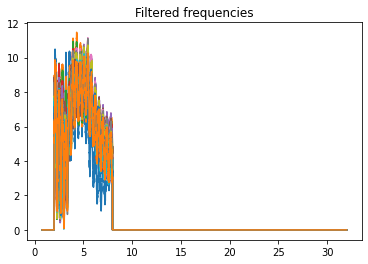

In [31]:
filtered  = []
for line in signal:
    FFT = np.fft.fft(line)
    for k in range(len(FFT)//2+1):
        if (f[k] < 2) or (f[k] > 8): ## Filtering the content of the probe spectrum
            FFT[k] = 0
            FFT[-k] = 0
    plt.plot(f[200:L//2],np.abs(FFT)[200:L//2])
    filtered.append(np.real(np.fft.ifft(FFT))[2000:]) # Removing 2000 pts from the start as it has little value and is a peak
    plt.title("Filtered frequencies")
filtered = np.array(filtered)

# Showing content of the lines

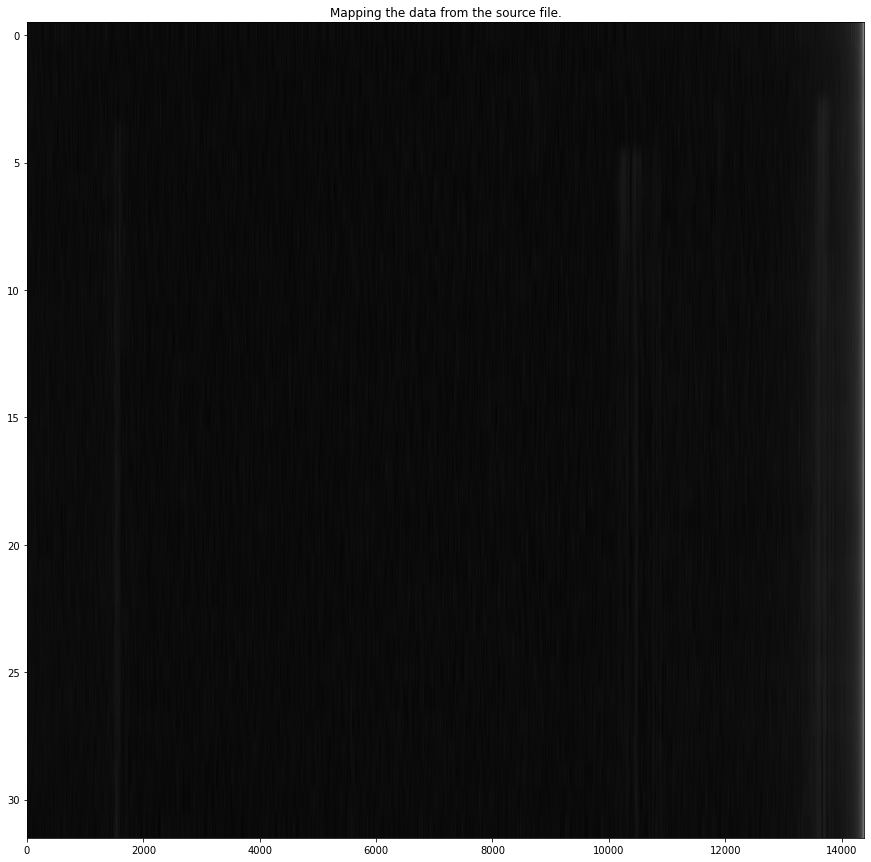

In [36]:
plt.figure(figsize=(15,15)) 
plt.imshow(np.abs((abs(filtered)**0.5)), aspect='auto',cmap=plt.get_cmap('gray')) 
plt.title("Mapping the data from the source file.")    
plt.show()